# **Exercise 1: HOG (Histogram of Oriented Gradients) Object Detection**
**Task:**
HOG is a feature descriptor widely used for object detection, particularly for human detection. In
this exercise, **you will:**
* Load an image containing a person or an object.
* Convert the image to grayscale.
* Apply the HOG descriptor to extract features.
* Visualize the gradient orientations on the image.
* Implement a simple object detector using HOG features

In [2]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
import os

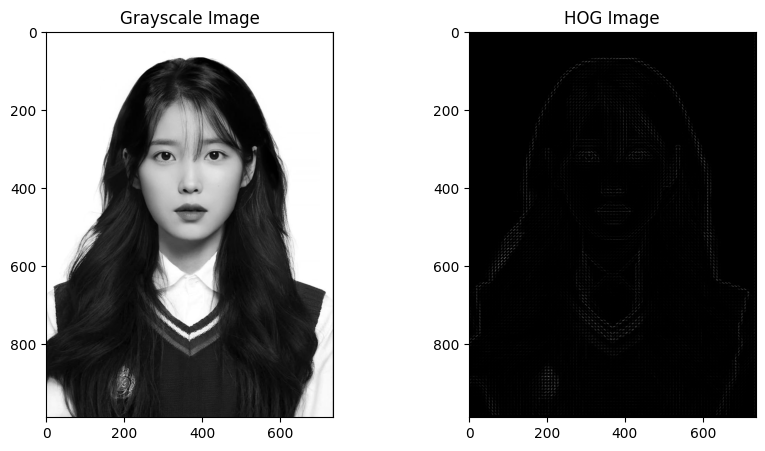

In [3]:
IMAGE1_PATH = os.path.join('..', 'assets', 'inputs', 'image1.jpg')
image = cv2.imread(IMAGE1_PATH)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hog_features, hog_image = hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True,
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')

plt.show()

### Conclusion
One of the effective techniques used for the object detection technique is known as HOG, which refers to Histogram of Oriented Gradients. It pretty much applies to pedestrians in the given image as well and captures the gradient orientation distribution in small connected regions of the image to describe objects more explicitly about shape and appearance. Being robust towards light variations and small distortions, this method has excellent capabilities to highlight edge structures and patterns.

Although successful in so many applications, HOG performance is also dependent on the size and orientation of objects to be detected, among others. Also, careful parameter tuning for optimal results, such as cell size and block normalization, may be required. Despite these challenges, HOG remains one of the most widely used methods in computer vision today because of its balance of simplicity and effectiveness. Specially, as mentioned in previous work, HOG is often used as a basic method to design more complex techniques and models for object detection tasks. Therefore, HOG remains to be an excellent option for researchers and practitioners who are looking to implement reliable object detection systems.

# **Exercise 2: YOLO (You Only Look Once) Object Detection**
**Task:**
YOLO is a deep learning-based object detection method. In this exercise, **you will:**
* Load a pre-trained YOLO model using TensorFlow.
* Feed an image to the YOLO model for object detection.
* Visualize the bounding boxes and class labels on the detected objects in the image.
* Test the model on multiple images to observe its performance.


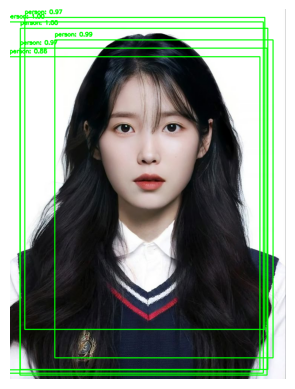

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths
YOLO_WEIGHTS_PATH = os.path.join('..', 'assets', 'inputs', 'yolov3.weights')
YOLO_CONF_PATH = os.path.join('..', 'assets', 'inputs', 'yolov3.cfg')
COCO_PATH = os.path.join('..', 'assets', 'inputs', 'coco.names')
IMAGE_PATH = os.path.join('..', 'assets', 'inputs', 'image1.jpg')

# Load YOLO
net = cv2.dnn.readNet(YOLO_WEIGHTS_PATH, YOLO_CONF_PATH)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class labels
with open(COCO_PATH, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Load image
image = cv2.imread(IMAGE_PATH)
height, width, channels = image.shape

# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Process the detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Draw bounding box
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Add label
            label = f"{classes[class_id]}: {confidence:.2f}"
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

### Conclusion
YOLO, or You Only Look Once, is an object detection algorithm marking a very different direction in the development of techniques in this field. It supports real-time detection with high accuracy, and there is no need for multiple stages, as in most other traditional methods. Here it treats object detection as a single regression problem where it can predict bounding boxes and class probabilities directly from full images in one forward pass. This in turn greatly improves the detection time and, hence, Yolo is well suited for applications that require real-time performance, such as video surveillance, self-driving cars, and robotics.

Generalization of the YOLO algorithm: Its one of the salient strengths of generalizing well across different kinds of environments and variations that leads to quite impressive accuracies and yet fast inference times are maintained. However, it suffers from the limitations like small objects failing to detect and also not an efficient system in case of occlusions. Also, the tradeoff between speed and accuracy can become dependent on which YOLO iteration was used, since later iterations will continuously improve performance due to better architectures and training techniques. Generally, YOLO remains at the forefront as an excellent algorithm choice for object detection applications that are very efficient and accurate enough to be trusted in many real-world applications.


# **Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow**
**Task:**
SSD is a real-time object detection method. For this exercise:
* Load an image of your choice.
* Utilize the TensorFlow Object Detection API to apply the SSD model.
* Detect objects within the image and draw bounding boxes around them.
* Compare the results with those obtained from the YOLO model.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


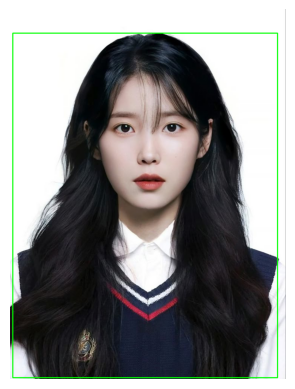

In [6]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define paths
MODEL_PATH = os.path.join('..', 'assets', 'inputs', 'ssd_mobilenet_v2_coco_2018_03_29', 'saved_model')
IMAGE_PATH = os.path.join('..', 'assets', 'inputs', 'image1.jpg')

# Load the model
model = tf.saved_model.load(MODEL_PATH)

def run_inference_for_single_image(model, image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model.signatures['serving_default'](input_tensor)

    return output_dict

# Load image
image_np = cv2.imread(IMAGE_PATH)

# Run inference
detections = run_inference_for_single_image(model, image_np)

# Process detections
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# Draw bounding boxes
image_np_with_detections = image_np.copy()
for i in range(num_detections):
    if detections['detection_scores'][i] > 0.5:
        ymin, xmin, ymax, xmax = detections['detection_boxes'][i]
        (left, right, top, bottom) = (xmin * image_np.shape[1], xmax * image_np.shape[1], ymin * image_np.shape[0], ymax * image_np.shape[0])
        cv2.rectangle(image_np_with_detections, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

### Conclusion

A single shot multi-box detector is an object detection framework that is capable of achieving impressive accuracy and speed. The speedy operation of SSD comes as a result of one forward pass, where multiple bounding boxes and class scores for the respective boxes are predicted. Having employed a series of convolutional layers at various feature map scales, SSD endures in the detection of objects of different sizes. It is also integrated with TensorFlow, which lets the developers gain access to the powerful tools and libraries for training, evaluation, and deployment.

Another interesting feature about SSD is that it can perform real-time object detection, which is a requirement for applications like surveillance systems, interactive video analysis, and even autonomous vehicles. Although it gives a good trade-off between speed and accuracy, the approach has a problem with objects whose size is less than or close to its resolution or have limited resolution as compared to other complicated architectures. Still, due to simple implementation and effective performance, SSD is extremely popular in the computer vision community. In summary, SSD is a very strong solution for real-time object detection tasks. Such a good combination of speed and accuracy can be achieved.
